.
# Supplementary Information : Benford's Law in Online Collaborative Platforms  

# Google BigQuery

In [123]:
#source: https://www.blendo.co/blog/access-data-google-bigquery-python-r/
#https://www.kaggle.com/sohier/how-to-integrate-bigquery-pandas
import time
from google.cloud import bigquery
import pandas as pd
import math
import numpy as np
%load_ext memory_profiler
%load_ext line_profiler

In [4]:
from google.oauth2 import service_account

In [7]:
cd "/Users/Carla/Desktop/MSc Social Data Science/Data Analytics at Scale"

/Users/carla/Desktop/MSc Social Data Science/Data Analytics at Scale


In [8]:
#get credentials here: https://console.cloud.google.com/apis/credentials?project=github-oii-summative&folder&organizationId
credentials = service_account.Credentials.from_service_account_file('Github-Oii-Summative-983e8fb0d7b8.json')

In [23]:
project_id = 'github-oii-summative'

In [24]:
client = bigquery.Client(credentials= credentials,project=project_id)

In [325]:
# query_job = client.query("""

# SELECT *
# FROM
# `github-oii-summative.Github_Contributors.results_20181202_014906` as gh 

# """)


In [133]:
#results = results.drop("firstnum", axis=1)
results.shape

(10211912, 4)

In [56]:
#results.to_csv(r'GitHub.txt', index=None, sep=',', mode='a')

# Setting up dataframe for analysis

Trying out a subset from the df

In [155]:
results = pd.read_csv("Github.txt")

In [335]:
results.sort_values(by='events_actor_count', ascending=False).head(20)

,actor_login,events_actor_count,firstnum,secondnum
4127894,LombiqBot,19043010,1,19
6169363,OpenLocalizationTest,4004083,4,40
8211679,grid-bot,2096788,2,20
1063339,ssbattousai,2039017,2,20
5148234,tmtmtmtm,1578035,1,15
9232944,KenanSulayman,1573479,1,15
1063340,everypoliticianbot,1429215,1,14
41317,direwolf-github,1240492,1,12
4127895,coveralls,1112175,1,11
9232945,CodePipeline-Test,1051884,1,10


In [156]:
res1 = results.sample(n=1)
res10 = results.sample(n=10)
res100 = results.sample(n=100)
res1k = results.sample(n=1000)
res10k = results.sample(n=10000)
res100k = results.sample(n=100000)
res1m = results.sample(n=1000000)

In [7]:
#printing series types via numpy
sub_results["events_actor_count"].dtypes

dtype('int64')

# Pandas
Convert your number to string and use list slicing 

In [159]:
def list_slice(df):
    df["events_actor_count"] = df["events_actor_count"].astype(str)
    df["firstnum"] = df["events_actor_count"].str[0].apply(int)
    df["secondnum"] = df["events_actor_count"].str[0:2].apply(int)
    df["events_actor_count"] = df["events_actor_count"].astype(int)

In [129]:
#bring it back to integer, since you converted to string above
results["events_actor_count"] = results["events_actor_count"].astype(int)

In [57]:
%timeit -n 5 list_slice(results)

16.2 s ± 473 ms per loop (mean ± std. dev. of 7 runs, 5 loops each)


In [121]:
%timeit -n 5 list_slice(res1)
%timeit -n 5 list_slice(res10)
%timeit -n 5 list_slice(res100)
%timeit -n 5 list_slice(res1k)
%timeit -n 5 list_slice(res10k)
%timeit -n 5 list_slice(res100k)
%timeit -n 5 list_slice(res1m)

2.77 ms ± 956 µs per loop (mean ± std. dev. of 7 runs, 5 loops each)
2.34 ms ± 825 µs per loop (mean ± std. dev. of 7 runs, 5 loops each)
1.54 ms ± 353 µs per loop (mean ± std. dev. of 7 runs, 5 loops each)
3 ms ± 424 µs per loop (mean ± std. dev. of 7 runs, 5 loops each)
17.9 ms ± 2.35 ms per loop (mean ± std. dev. of 7 runs, 5 loops each)
168 ms ± 10 ms per loop (mean ± std. dev. of 7 runs, 5 loops each)
1.63 s ± 124 ms per loop (mean ± std. dev. of 7 runs, 5 loops each)


In [125]:
%memit list_slice(results)

peak memory: 1928.99 MiB, increment: 840.11 MiB


In [169]:
%lprun -f list_slice list_slice(results)

Timer unit: 1e-06 s

Total time: 24.1751 s
File: <ipython-input-114-5a07a853c036>
Function: list_slice at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def list_slice(df):
     2         1     909786.0 909786.0      3.8      df["events_actor_count"] = df["events_actor_count"].astype(str)
     3         1   14645551.0 14645551.0     60.6      df["firstnum"] = df["events_actor_count"].str[0].apply(int)
     4         1    8619732.0 8619732.0     35.7      df["secondnum"] = df["events_actor_count"].str[0:2].apply(int)

# Math

In [127]:
def math_o(df):
    df["firstnum"] = df["events_actor_count"].map(lambda x: x // 10 ** (int(math.log(x, 10)) - 1 + 1))
    df["secondnum"] = df["events_actor_count"].map(lambda x: x // 10 ** (int(math.log(x, 10)) - 2 + 1))

In [133]:
%timeit -n 5 math_o(res1)
%timeit -n 5 math_o(res10)
%timeit -n 5 math_o(res100)
%timeit -n 5 math_o(res1k)
%timeit -n 5 math_o(res10k)
%timeit -n 5 math_o(res100k)
%timeit -n 5 math_o(res1m)
%timeit -n 5 math_o(results)

1.2 ms ± 435 µs per loop (mean ± std. dev. of 7 runs, 5 loops each)
797 µs ± 87.8 µs per loop (mean ± std. dev. of 7 runs, 5 loops each)
2.25 ms ± 671 µs per loop (mean ± std. dev. of 7 runs, 5 loops each)
3.11 ms ± 480 µs per loop (mean ± std. dev. of 7 runs, 5 loops each)
18.9 ms ± 1.77 ms per loop (mean ± std. dev. of 7 runs, 5 loops each)
175 ms ± 10.3 ms per loop (mean ± std. dev. of 7 runs, 5 loops each)
1.79 s ± 93.1 ms per loop (mean ± std. dev. of 7 runs, 5 loops each)
17.5 s ± 235 ms per loop (mean ± std. dev. of 7 runs, 5 loops each)


In [134]:
%memit math_o(results)

peak memory: 1433.32 MiB, increment: 254.61 MiB


# Numpy

List slicing has at least O(n) time complexity and the string conversion has O(n) space complexity.  Performance can be seen by the timeit function.  Here is a code for constant time and space complexity.

In [164]:
def numpy(df):
    one = lambda a: a // 10 ** (int(np.math.log(a,10) - 1 + 1))
    two = lambda a: a // 10 ** (int(np.math.log(a,10) - 2 + 1))

    first_digit = np.vectorize(one)
    sec_digit = np.vectorize(two)
    col3 = first_digit(df.values[:,1])
    col4 = sec_digit(df.values[:,1])
    print(col3, col4)

In [118]:
%timeit -n 5 numpy(results)

15.1 s ± 1.53 s per loop (mean ± std. dev. of 7 runs, 5 loops each)


In [120]:
%timeit -n 5 numpy(res1)
%timeit -n 5 numpy(res10)
%timeit -n 5 numpy(res100)
%timeit -n 5 numpy(res1k)
%timeit -n 5 numpy(res10k)
%timeit -n 5 numpy(res100k)
%timeit -n 5 numpy(res1m)

279 µs ± 87 µs per loop (mean ± std. dev. of 7 runs, 5 loops each)
238 µs ± 62.7 µs per loop (mean ± std. dev. of 7 runs, 5 loops each)
424 µs ± 96.7 µs per loop (mean ± std. dev. of 7 runs, 5 loops each)
2.26 ms ± 466 µs per loop (mean ± std. dev. of 7 runs, 5 loops each)
16.9 ms ± 1.64 ms per loop (mean ± std. dev. of 7 runs, 5 loops each)
164 ms ± 4.81 ms per loop (mean ± std. dev. of 7 runs, 5 loops each)
1.82 s ± 176 ms per loop (mean ± std. dev. of 7 runs, 5 loops each)


In [303]:
%memit numpy(results)

[1 1 1 ... 3 3 3] [13 13 13 ... 30 30 30]
peak memory: 1688.59 MiB, increment: 937.68 MiB


In [310]:
%lprun -f numpy numpy(results)

[1 1 1 ... 3 3 3] [13 13 13 ... 30 30 30]


Timer unit: 1e-06 s

Total time: 21.3734 s
File: <ipython-input-164-3aa32a8fe6ab>
Function: numpy at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def numpy(df):
     2         1          3.0      3.0      0.0      one = lambda a: a // 10 ** (int(np.math.log(a,10) - 1 + 1))
     3         1          2.0      2.0      0.0      two = lambda a: a // 10 ** (int(np.math.log(a,10) - 2 + 1))
     4                                           
     5         1         31.0     31.0      0.0      first_digit = np.vectorize(one)
     6         1         14.0     14.0      0.0      sec_digit = np.vectorize(two)
     7         1   11065210.0 11065210.0     51.8      col3 = first_digit(df.values[:,1])
     8         1   10307635.0 10307635.0     48.2      col4 = sec_digit(df.values[:,1])
     9         1        503.0    503.0      0.0      print(col3, col4)

# Cython

Adding type to increase performance
https://stackoverflow.com/questions/701322/how-can-you-get-the-first-digit-in-an-int-c

In [172]:
%load_ext Cython

The Cython extension is already loaded. To reload it, use:
  %reload_ext Cython


## Parallelizing Cython

**Ran into gil problems - i am aborting mission!**

%% cython with parallelization

cimport cython
cimport numpy as c_np
import numpy as np
import math
import time

from cython.parallel import prange

@cython.boundscheck(False)
@cython.wraparound(False)

def cyth_dig_par(np.ndarray[np.int64, ndim=1] results_array):
    cdef int firstDigit, secDigit, leng
    leng = len(results_array)
    for i in prange(leng, nogil=True):
        firstDigit[i] = results_array[i] // 10
    return firstDigit

# Parallel computing using PySpark

**Also aborting mission, can't get it to work!**

https://www.youtube.com/watch?v=dzYEWULDIAQ&list=PLE50-dh6JzC5zo2whIGqJ02CIhP3ysQLX&index=5

In [204]:
import pyspark as spark

In [240]:
from pyspark.sql import SparkSession
from pyspark import SparkContext, SQLContext

spark = SparkSession \
    .builder \
    .appName ("test") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

In [206]:
df = spark.read.csv("GitHub.txt", header=True)

In [237]:
df.printSchema()

root
 |-- actor_login: string (nullable = true)
 |-- events_actor_count: string (nullable = true)



In [32]:
df.head(5)

[Row(actor_login='neimv', events_actor_count='132'),
 Row(actor_login='amberlea84', events_actor_count='132'),
 Row(actor_login='TheAdamBorek', events_actor_count='132'),
 Row(actor_login='BobbyTowers', events_actor_count='132'),
 Row(actor_login='HeathStace3004', events_actor_count='132')]

In [42]:
df.show()

+---------------+------------------+
|    actor_login|events_actor_count|
+---------------+------------------+
|          neimv|               132|
|     amberlea84|               132|
|   TheAdamBorek|               132|
|    BobbyTowers|               132|
| HeathStace3004|               132|
|        cloudkj|               132|
|      wangmeiqi|               132|
|       superVHS|               132|
|obiwanmikenolte|               132|
|       amdadria|               132|
|       Amrsaeed|               132|
|    AldanisVigo|               132|
|     AtoCrafter|               132|
|        POlITIC|               132|
|       nitaj96a|               132|
|           jpae|               132|
|         maater|               132|
|       miker123|               132|
|   steven-aerts|               132|
|        cummack|               132|
+---------------+------------------+
only showing top 20 rows



**Parallelization**

https://annefou.github.io/pyspark/03-pyspark_context/ <br>
https://blog.cloudera.com/blog/2015/09/how-to-prepare-your-apache-hadoop-cluster-for-pyspark-jobs/

In [255]:
#Default number of partitions
df.rdd.getNumPartitions()

4

In [ ]:
# to convert to array
vals = np.array(df.select('events_actor_count').collect())

In [ ]:
#parallelization
rdd = sc.parallelize(vals)

In [ ]:
#example from book
test = rdd.map(lambda x: x[0]**2)

#to apply to code: transform via map, action via collect (or take5 if impatient)
one = rdd.map(lambda a: a // 10 ** (int(np.math.log(a,10) - 1 + 1))).take(5).foreach(println)
two = rdd.map(lambda a: a // 10 ** (int(np.math.log(a,10) - 2 + 1))).collect()

In [ ]:
# sample splitting
sample1, sample2, sample3 = np.split(vals,3)
#or
rdd = sc.parallelize(vals, 4) #four partitions which is default

# Multiprocessing

In [316]:
from multiprocessing import Pool

In [324]:
def job(Value):
    return Value // 10 ** (int(np.math.log(Value,10)-1+1))

def job2(Value):
    return Value // 10 ** (int(np.math.log(Value,10)-2+1))
    
if __name__ == "__main__":
    start = time.time()
    p = Pool(processes = 20)
    FirstDigit = p.map(job, results['events_actor_count'])
    SecondDigit = p.map(job2, results['events_actor_count'])
    p.close()
    firstnum = pd.DataFrame({'firstnum':FirstDigit})
    end = time.time()
    print("Took %f ms" % ((end-start)*1000))
    %memit

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



<img src="sc.png" width="500">

# Correlations

<img src="corr.png" width="500">

# Benchmarking

In [417]:
bm_multi = [.859816551, .872070789, .859011412,.906384706,.815159559,.990002632,2.116918087,8.062006474]
cyth = [0.000927, 0.00226,0.00162,0.00433,0.0282,0.282,2.92,27.6]
numpy = [0.000279, 0.000238, 0.000424,0.00226, 0.0169,0.164,1.8,15.1]
pandas = [0.00277, 0.00234, 0.00154,0.003,0.0179,.168,1.63,16.2]

In [410]:
x1 = ['1','10','100','1k','10k','100k','1m','All']
x = [1,10,100,1000,10000,100000,1000000,10211912]

Text(0.5,0,'Number of data points')

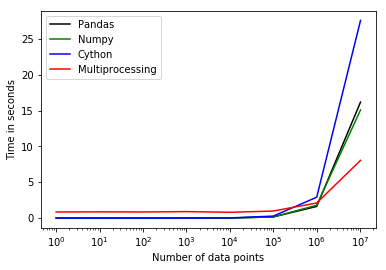

In [533]:
plt.figure()#figsize=(10,5))
plt.plot(x, pandas, 'black', label = 'Pandas')
plt.plot(x, numpy, 'g', label = 'Numpy')
plt.plot(x, cyth,'b', label = 'Cython')
plt.plot(x, bm_multi, 'r', label = 'Multiprocessing')
plt.legend(loc='upper left')
plt.xscale('log')
#plt.yscale('log')
plt.ylabel("Time in seconds")
plt.xlabel("Number of data points")
#plt.ylim(top=100) 


Text(0.5,0,'Number of data points')

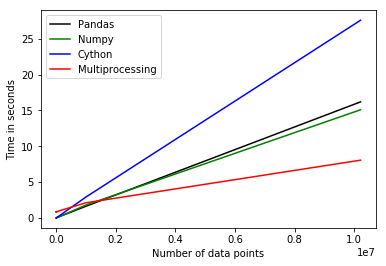

In [543]:
# alternative view
plt.plot(x, pandas, 'black', label = 'Pandas')
plt.plot(x, numpy, 'g', label = 'Numpy')
plt.plot(x, cyth,'b', label = 'Cython')
plt.plot(x, bm_multi, 'r', label = 'Multiprocessing')
plt.legend(loc='upper left')
#plt.xscale('log')
#plt.yscale('log')
plt.ylabel("Time in seconds")
plt.xlabel("Number of data points")
#plt.ylim(top=100) 

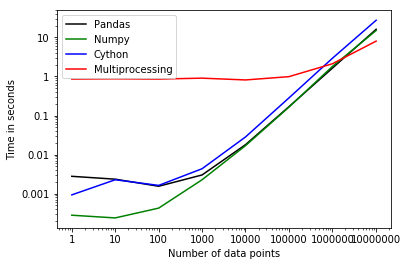

In [536]:
#with number formatting
fig, ax = plt.subplots()#figsize=(10, 5))
ax.plot(x, pandas, 'black', label = 'Pandas')
ax.plot(x, numpy, 'g', label = 'Numpy')
ax.plot(x, cyth,'b', label = 'Cython')
ax.plot(x, bm_multi, 'r', label = 'Multiprocessing')
ax.legend(loc='upper left')

ax.loglog()
ax.set_ylabel("Time in seconds")
ax.set_xlabel("Number of data points")

import matplotlib.ticker as ticker

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(y),0)))).format(y)))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(y),0)))).format(y)))
plt.show()

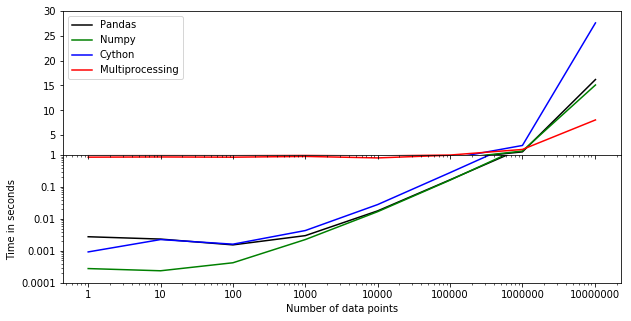

In [531]:
## Linear above and log below.
#https://stackoverflow.com/questions/21746491/combining-a-log-and-linear-scale-in-matplotlib

# linear and log axes for the same plot?
# starting with the histogram example from 
# http://matplotlib.org/mpl_toolkits/axes_grid/users/overview.html
from mpl_toolkits.axes_grid1 import make_axes_locatable
plt.figure(figsize=(10,5))

xdomain = x

axMain = plt.subplot(111)
#axMain.plot(xdomain, np.sin(xdomain))
axMain.plot(xdomain, pandas, 'black', label = 'Pandas')
axMain.plot(xdomain, numpy, 'g', label = 'Numpy')
axMain.plot(xdomain, cyth,'b', label = 'Cython')
axMain.plot(xdomain, bm_multi, 'r', label = 'Multiprocessing')

axMain.set_yscale('log')
axMain.set_ylim((0.0001, 1))
axMain.set_ylabel("Time in seconds")
axMain.set_xlabel("Number of data points")
divider = make_axes_locatable(axMain)

axLin = divider.append_axes("top", size=2, pad=0.001, sharex=axMain)

axLin.plot(xdomain, pandas, 'black', label = 'Pandas')
axLin.plot(xdomain, numpy, 'g', label = 'Numpy')
axLin.plot(xdomain, cyth,'b', label = 'Cython')
axLin.plot(xdomain, bm_multi, 'r', label = 'Multiprocessing')

axLin.set_xscale('log')
axLin.set_ylim((1, 30))
axLin.legend(loc='upper left')

# Removes bottom axis line
axLin.spines['bottom'].set_visible(False)
#axLin.xaxis.set_ticks_position('top')
plt.setp(axLin.get_xticklabels(), visible=False)

axMain.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(y),0)))).format(y)))
axMain.xaxis.set_major_formatter(ticker.FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(y),0)))).format(y)))


#plt.title('Linear above, log below')

plt.show()

# Visualizations

In [334]:
from matplotlib import pyplot as plt

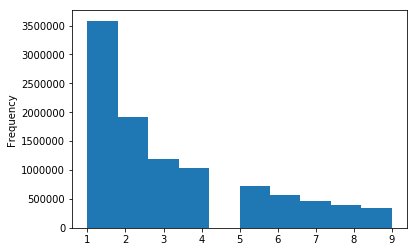

In [337]:
results.firstnum.plot(kind="hist")

In [341]:
benford = [0.301, 0.1761, 0.1249, 0.0969, 0.0792, 0.0669, 0.058, 0.0512,0.0458]
gh_small = [0.209406, 0.278791, 0.138859, 0.090308, 0.069295, 0.056152,0.047657,0.043097,0.034782]

gh_benford = list(results.firstnum.value_counts(normalize=True).sort_index())
chart = pd.DataFrame(list(zip(gh_benford,gh_small, benford)), columns = ["Github-full sample","Github-small sample", "Benford's law"])
chart.index = chart.index+1 #for the chart
chart

,Github-full sample,Github-small sample,Benford's law
1,0.350865,0.209406,0.3010
2,0.188211,0.278791,0.1761
3,0.116198,0.138859,0.1249
4,0.101226,0.090308,0.0969
5,0.070326,0.069295,0.0792
6,0.055659,0.056152,0.0669
7,0.045374,0.047657,0.0580
8,0.038800,0.043097,0.0512
9,0.033341,0.034782,0.0458


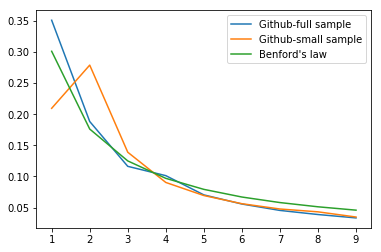

In [342]:
plt.plot(chart)
plt.legend(chart.columns)

# Statistics

In [545]:
from scipy import stats

In [546]:
stats.chisquare(gh_small, gh_benford)

Power_divergenceResult(statistic=0.10689525498600294, pvalue=0.9999996742012074)

In [547]:
stats.chisquare(benford, gh_benford)

Power_divergenceResult(statistic=0.024224407913710538, pvalue=0.999999999111875)

In [548]:
stats.ks_2samp(gh_small, gh_benford)

Ks_2sampResult(statistic=0.11111111111111116, pvalue=0.9999999450421078)

In [549]:
stats.ks_2samp(benford, gh_benford)

Ks_2sampResult(statistic=0.3333333333333333, pvalue=0.6030013612753802)

https://stackoverflow.com/questions/41271299/how-can-i-get-the-first-two-digits-of-a-number

https://stackoverflow.com/questions/47404869/calculating-big-o-notation-with-recursion

In a nutshell - concurrent: many different operations happening at once. parallel: the same operation broken into small bits happening at once. Distributed Computing is a subset of Parallel Computing; in turn, Parallel Computing is a subset of Concurrent Computing. 